In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pickle as pkl
from keras.models import model_from_json
from keras import optimizers
%run utils/utils_keras.py

Using TensorFlow backend.


In [2]:
from keras.models import model_from_json
from tensorflow.python.summary.summary_iterator import summary_iterator

In [3]:
def load_models(dir_name):
    loaded_models = []
    for m in models_reference:
        model_stamp = m[0]
        alpha = m[1]

        # load json and create model
        json_file = open(dir_name + 'model_' + model_stamp + '.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)

        BATCH_SIZE = 1024

        LOSS_WEIGHTS = [1,      # MAIN TASK
                        alpha]      # AUXILIARY TASK
        opt = optimizers.Adam(lr=0.001)
        loaded_model.compile(loss=['mse', 'mse'],
                      optimizer=opt,
                      metrics=[mape, mae, mare],
                      loss_weights=LOSS_WEIGHTS)
        # load weights into new model
        loaded_model.load_weights(dir_name + 'model_' + model_stamp + '.h5')
        print("Loaded model from disk")

        loaded_models.append(loaded_model)
    return loaded_models

In [4]:
base = 5
test_pts = [0,
            base**-4,
            base**-3.5,
            base**-3, 
            base**-2.5, 
            base**-2, 
            base**-1.5,
            base**-1,
            base**-.5,
            base**0,
            base**0.125,
            base**0.250,
            base**0.375,
            base**0.500
           ]
test_pts

[0,
 0.0016,
 0.0035777087639996636,
 0.008,
 0.01788854381999832,
 0.04,
 0.08944271909999159,
 0.2,
 0.4472135954999579,
 1,
 1.2228445449938519,
 1.4953487812212205,
 1.8285790999795744,
 2.23606797749979]

#### LOAD TEST DATA AND RUN MODELS

In [5]:
test_input = pkl.load(open('test_input.dat', 'rb'))
test_output = pkl.load(open('test_output.dat', 'rb'))

#### MODEL NAMES

In [6]:
# model_names = \
# ['model_1554177052.3138962', # alpha = 0 
# 'model_1554181808.3258216',  # alpha =
# 'model_1554186554.3595924',  # alpha =
# 'model_1554191354.544388',   # alpha =
# 'model_1554196187.0656266',  # alpha =
# 'model_1554201029.9175177',  # alpha =
# 'model_1554205938.8762002',  # alpha =
# 'model_1554210894.0473723',  # alpha =
# 'model_1554215907.0674012',  # alpha =
# 'model_1554221013.9726577']  # alpha = 1

# models = [\
# '1554177052.3138962',  # alpha = 0 
# '1554181808.3258216',  # alpha =
# '1554186554.3595924',  # alpha =
# '1554191354.544388' ,  # alpha =
# '1554196187.0656266',  # alpha =
# '1554201029.9175177',  # alpha =
# '1554205938.8762002',  # alpha =
# '1554210894.0473723',  # alpha =
# '1554215907.0674012',  # alpha =
# '1554221013.9726577',  # alpha = 1
# '1554250114.4923391',  # alpha = 1.222
# '1554254216.134307' ,  # alpha = 
# '1554258361.1193156',  # alpha = 
# '1554262448.4434893'   # alpha = 2.23606797749979
# ]

unbalanced_models_2 = [\
#'1554422791.7792547',
'1554422818.8235586',
'1554426879.9531016',
'1554430953.3309429',
'1554435048.0393565',
'1554439183.0649233',
'1554443355.0479126',
'1554447541.2389681',
'1554451753.9221995',
'1554456013.3321753',
'1554460297.720705',
'1554464592.7604427',
'1554468922.923963',
'1554473297.1003575',
'1554477702.190446']

models = unbalanced_models_2

models_reference = [[models[i],test_pts[i]] for i in range(len(models))]

dir_name = '../keras_models_norm/'
loaded_models = load_models(dir_name)

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk


#### RUN MODELS ON TEST SET

In [14]:
loaded_models[5].summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 36)           0                                            
__________________________________________________________________________________________________
shared_dense1 (Dense)           (None, 100)          3700        input_8[0][0]                    
__________________________________________________________________________________________________
shared_dense2 (Dense)           (None, 100)          10100       shared_dense1[0][0]              
__________________________________________________________________________________________________
shared_dense3 (Dense)           (None, 200)          20200       shared_dense2[0][0]              
__________________________________________________________________________________________________
shared_den

In [7]:
BATCH_SIZE = 1024

test_scores = []
for i in range(len(loaded_models)):
    print("alpha =", test_pts[i])
    score = loaded_models[i].evaluate(test_input, [test_output[:,0],test_output[:,1]], batch_size=BATCH_SIZE)
    test_scores.append(score)
test_scores = np.array(test_scores)

alpha = 0
972296/972296 [==============================] - 2s 2us/step
alpha = 0.0016
972296/972296 [==============================] - 2s 2us/step
alpha = 0.0035777087639996636
972296/972296 [==============================] - 2s 2us/step
alpha = 0.008
972296/972296 [==============================] - 2s 2us/step
alpha = 0.01788854381999832
972296/972296 [==============================] - 2s 2us/step
alpha = 0.04
972296/972296 [==============================] - 2s 2us/step
alpha = 0.08944271909999159
972296/972296 [==============================] - 2s 2us/step
alpha = 0.2
972296/972296 [==============================] - 2s 2us/step
alpha = 0.4472135954999579
972296/972296 [==============================] - 2s 2us/step
alpha = 1
972296/972296 [==============================] - 2s 2us/step
alpha = 1.2228445449938519
972296/972296 [==============================] - 2s 2us/step
alpha = 1.4953487812212205
972296/972296 [==============================] - 2s 2us/step
alpha = 1.8285790999795744


In [16]:
test_df = pd.DataFrame(test_scores, 
                       columns=['loss', 'loss_dur', 'loss_dist', 'mape_dur', 
                                'mae_dur', 'mare_dur', 'mape_dist', 'mae_dist', 'mare_dist'],
                       index=test_pts)\
          .reset_index()\
          .rename({'index':'alpha'}, axis=1)
test_df[:10]

,alpha,loss,loss_dur,loss_dist,mape_dur,mae_dur,mare_dur,mape_dist,mae_dist,mare_dist
0,0.000000,0.001536,0.001536,16.471163,26.032967,0.024718,20.387207,9915.148282,3.303451,4386.116428
1,0.001600,0.001543,0.001542,0.000264,26.841938,0.024723,20.391439,14.381437,0.007806,10.356708
2,0.003578,0.001569,0.001568,0.000265,23.877127,0.024333,20.068767,16.165345,0.007613,10.099869
3,0.008000,0.001544,0.001542,0.000262,27.258087,0.025074,20.681651,15.005219,0.007497,9.946544
4,0.017889,0.001537,0.001533,0.000253,26.623078,0.024645,20.326740,16.265629,0.007629,10.122099
5,0.040000,0.001562,0.001552,0.000250,25.405722,0.024359,20.090073,13.736138,0.007207,9.561176
6,0.089443,0.001576,0.001552,0.000263,27.390721,0.025260,20.834215,19.655308,0.008561,11.360463
7,0.200000,0.001579,0.001530,0.000245,26.519726,0.024857,20.502293,12.537379,0.006959,9.231374
8,0.447214,0.001642,0.001534,0.000242,26.560618,0.024967,20.592809,14.236619,0.007329,9.721881
9,1.000000,0.001845,0.001606,0.000239,25.260238,0.024616,20.302410,13.179429,0.006946,9.214983


In [39]:
test_df = pd.DataFrame(test_scores, 
                       columns=['loss', 'loss_dur', 'loss_dist', 'mape_dur', 
                                'mae_dur', 'mare_dur', 'mape_dist', 'mae_dist', 'mare_dist'],
                       index=test_pts)\
          .reset_index()\
          .rename({'index':'alpha'}, axis=1)
test_df

,alpha,loss,loss_dur,loss_dist,mape_dur,mae_dur,mare_dur,mape_dist,mae_dist,mare_dist
0,0.000000,0.001540,0.001540,1.659698,28.267091,0.025196,20.782152,3696.767486,1.028998,1366.639551
1,0.001600,0.001537,0.001537,0.000261,27.970694,0.024931,20.562918,13.858454,0.007519,9.974595
2,0.003578,0.001546,0.001545,0.000257,27.553275,0.024859,20.503205,15.215545,0.007625,10.115665
3,0.008000,0.001529,0.001527,0.000259,25.538001,0.024655,20.335397,14.816475,0.007744,10.273915
4,0.017889,0.001542,0.001538,0.000254,28.080383,0.025149,20.743029,13.585693,0.007381,9.791151
5,0.040000,0.001540,0.001530,0.000248,27.191021,0.024530,20.231759,13.202215,0.007221,9.580180
6,0.089443,0.001553,0.001531,0.000244,25.244632,0.024338,20.073427,12.807043,0.006982,9.262699
7,0.200000,0.001582,0.001534,0.000241,28.916579,0.025273,20.845991,11.834130,0.006882,9.129233
8,0.447214,0.001636,0.001529,0.000240,28.346560,0.025147,20.741804,12.599313,0.006929,9.191381
9,1.000000,0.001759,0.001523,0.000237,24.550085,0.024149,19.917155,15.261652,0.007225,9.585524


In [15]:
### READ TIME_STAMPS
dir_name = './tb_logs_norm_unbalanced_2//'
folders = []
for filepath in glob.iglob(dir_name + '*'):
    folders.append(filepath[filepath.find('\\')+1:])

# Remove first 11 items
folders = folders[11:]

folders = unbalanced_models_2
folders

['1554422818.8235586',
 '1554426879.9531016',
 '1554430953.3309429',
 '1554435048.0393565',
 '1554439183.0649233',
 '1554443355.0479126',
 '1554447541.2389681',
 '1554451753.9221995',
 '1554456013.3321753',
 '1554460297.720705',
 '1554464592.7604427',
 '1554468922.923963',
 '1554473297.1003575',
 '1554477702.190446']

In [16]:
def get_history(full_path):
    
    tags = set()
    
    for e in summary_iterator(full_path):
        c = e.summary.value
        if len(c) != 1:
            continue
        tags.add(c[0].tag)

    history = {}
    for tag in tags:
        history[tag] = np.empty((0,2))
    
    for e in summary_iterator(full_path):
        c = e.summary.value
        if len(c) != 1:
            continue
        history[c[0].tag] = np.append(history[c[0].tag], 
                                      [[e.wall_time, c[0].simple_value]], 
                                      axis=0)
    return history

In [17]:
tensorboard_data = {}
for folder in folders:
    
    # Fetch file
    file_path = glob.glob(dir_name + folder + "/*")[0]
    file_name = file_path[file_path.rfind('\\')+1:]
    
    full_path = dir_name + folder + '/' + file_name
    
    tensorboard_data[folder] = get_history(full_path)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [18]:
curves = [\
'epoch_loss',
'epoch_duration_loss',
'epoch_distance_loss',
'epoch_duration_mae',
'epoch_duration_mape',
'epoch_duration_mare',
'epoch_distance_mae',
'epoch_distance_mape',
'epoch_distance_mare']

def plot_curve_across_models(curve_name):
    plt.figure(figsize=(20,4))
    for time_stamp in models:
        plt.title(curve_name)
        plt.plot(tensorboard_data[time_stamp][curve_name][:,1])
    plt.show()

def plot_losses_all_models(models):
    for time_stamp in models:
        plt.figure(figsize=(20,4))
        plt.subplot(1,3,1)
        plt.title('Total Loss')
        plt.plot(tensorboard_data[time_stamp]['epoch_loss'][:,1])
        plt.plot(tensorboard_data[time_stamp]['epoch_val_loss'][:,1])
        plt.subplot(1,3,2)
        plt.title('Duration Loss')
        plt.plot(tensorboard_data[time_stamp]['epoch_duration_loss'][:,1])
        plt.plot(tensorboard_data[time_stamp]['epoch_val_duration_loss'][:,1])
        plt.subplot(1,3,3)
        plt.title('Distance Loss')
        plt.plot(tensorboard_data[time_stamp]['epoch_distance_loss'][:,1])
        plt.plot(tensorboard_data[time_stamp]['epoch_val_distance_loss'][:,1])
    plt.show()

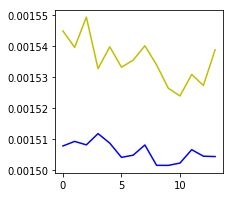

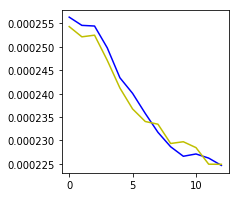

In [101]:
plt.figure(figsize=(3,3))
plt.plot([tensorboard_data[time_stamp]['epoch_duration_loss'][:,1][-1] for time_stamp in models],c='b')
plt.plot([tensorboard_data[time_stamp]['epoch_val_duration_loss'][:,1][-1] for time_stamp in models],c='y')

plt.figure(figsize=(3,3))
plt.plot([tensorboard_data[time_stamp]['epoch_distance_loss'][:,1][-1]     for time_stamp in models][1:],c='b')
plt.plot([tensorboard_data[time_stamp]['epoch_val_distance_loss'][:,1][-1] for time_stamp in models][1:],c='y')

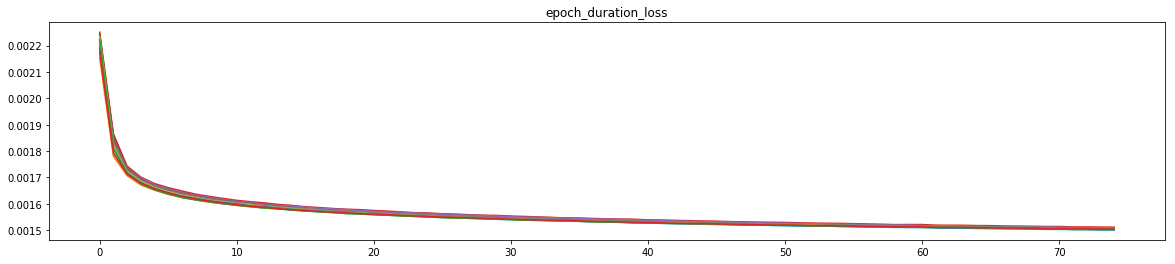

In [75]:
plot_curve_across_models('epoch_duration_loss')

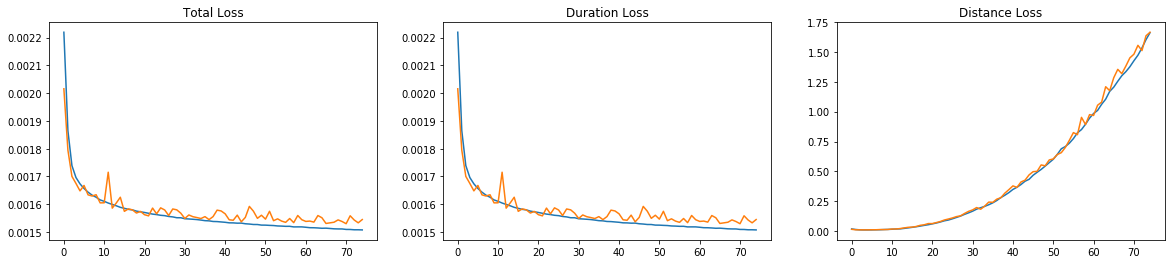

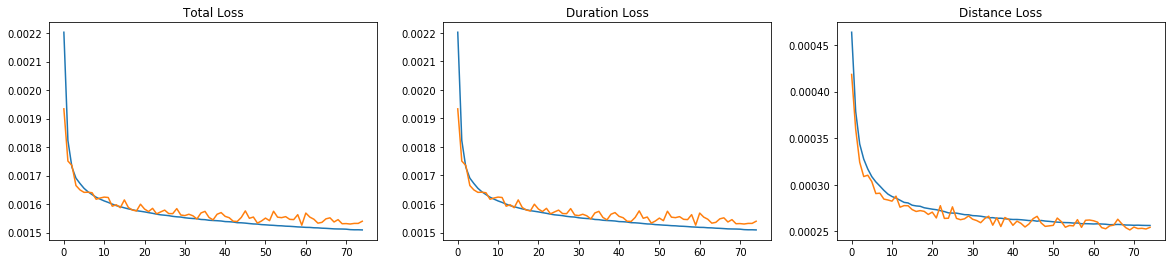

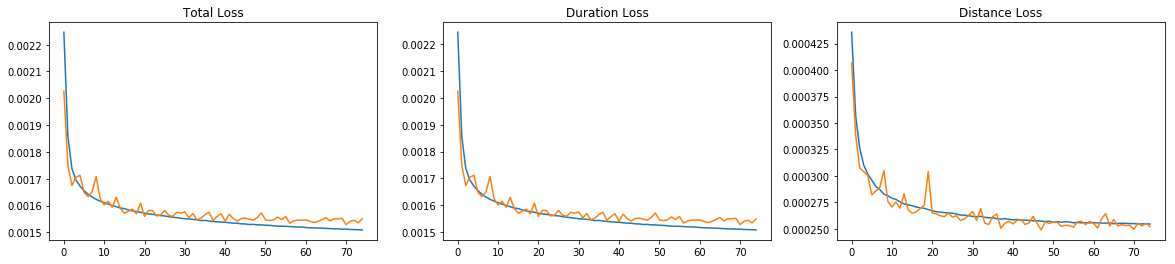

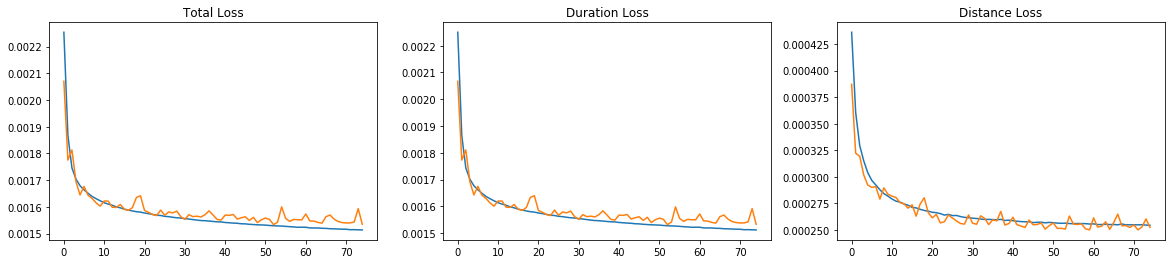

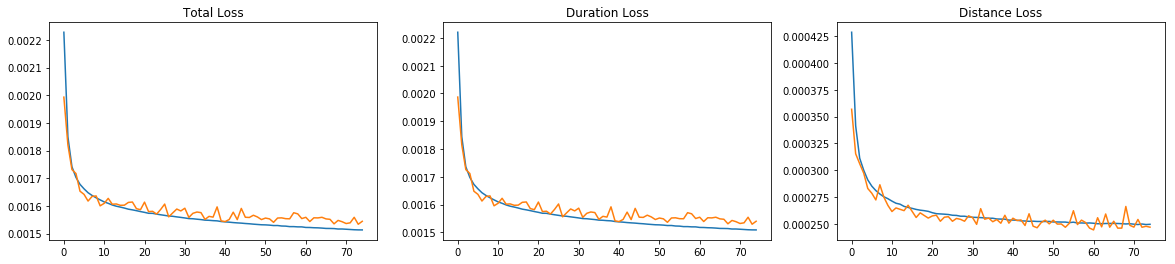

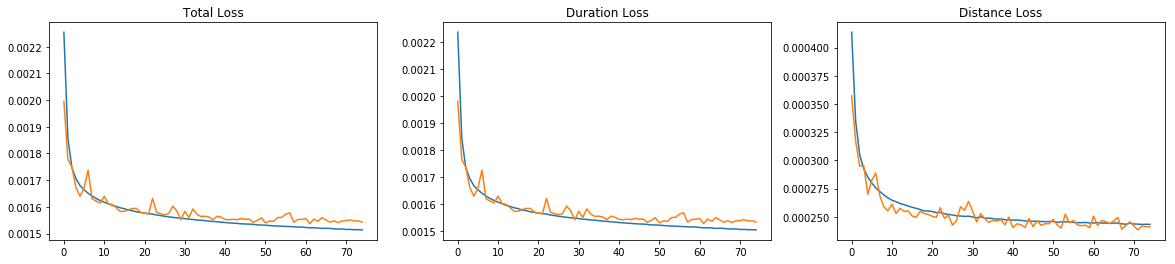

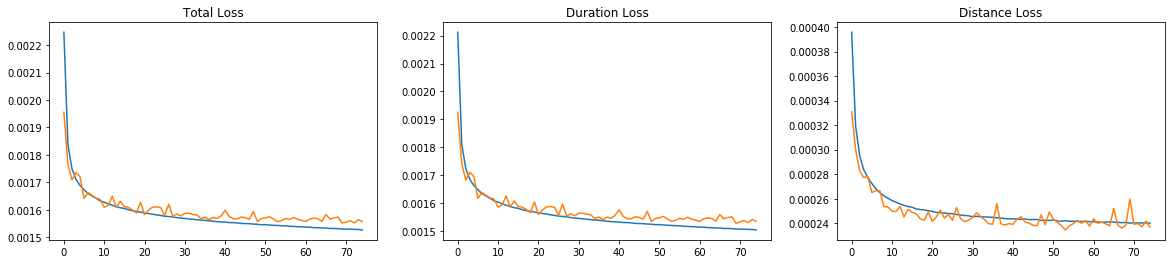

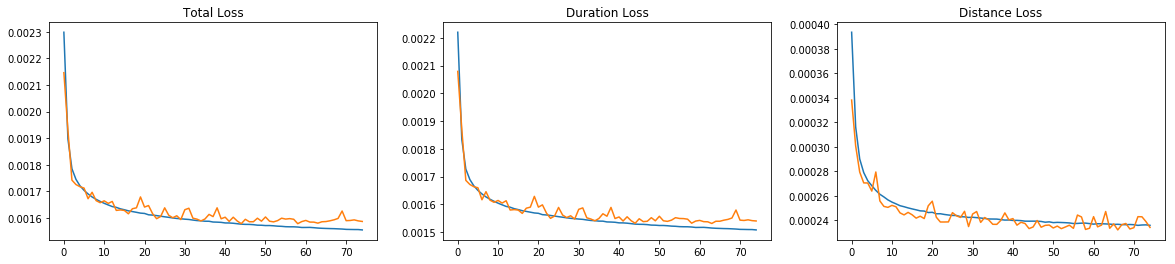

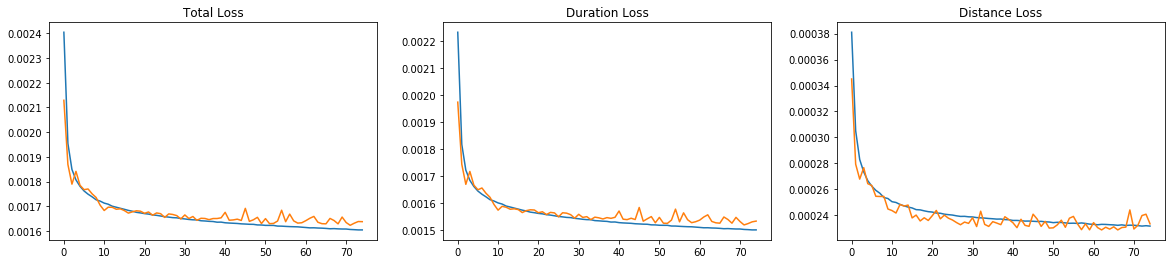

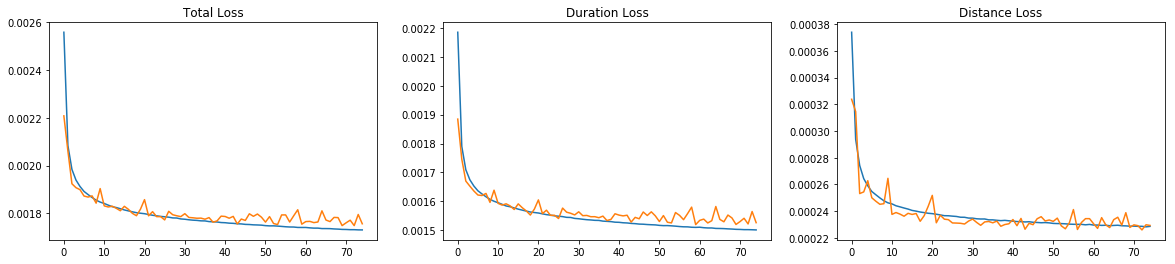

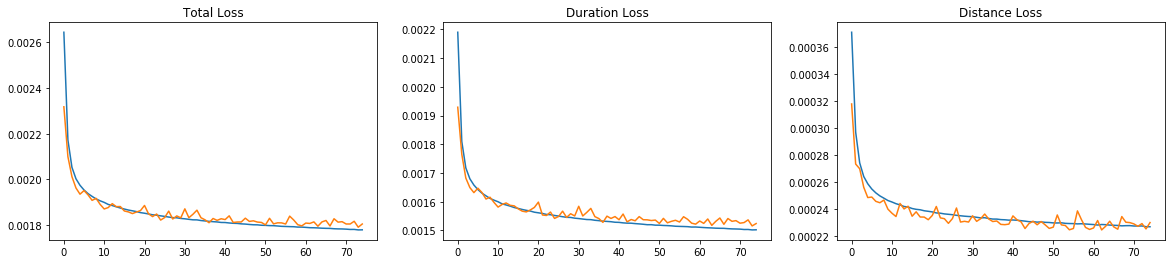

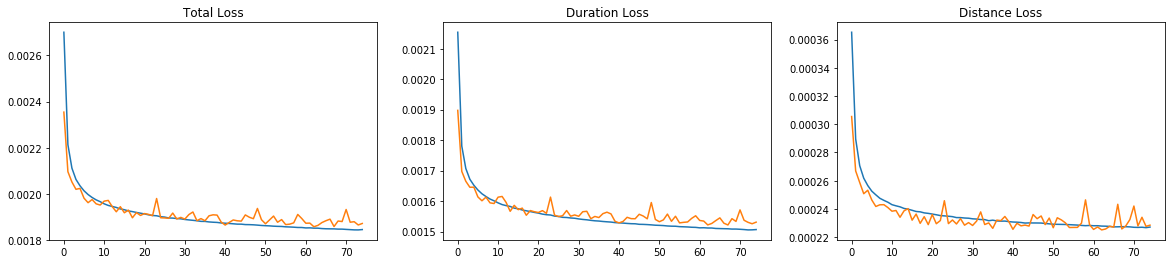

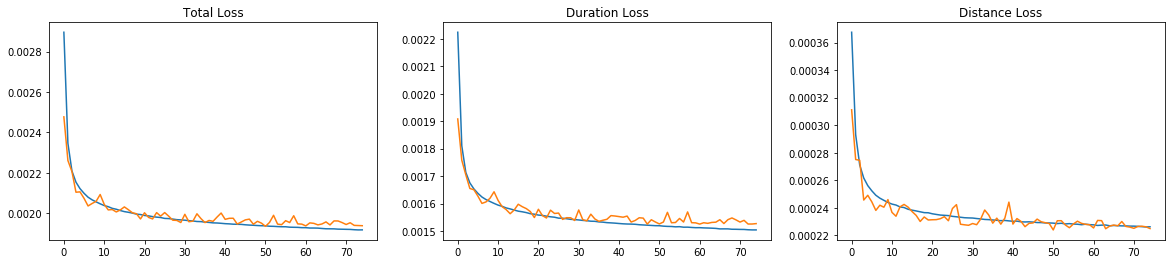

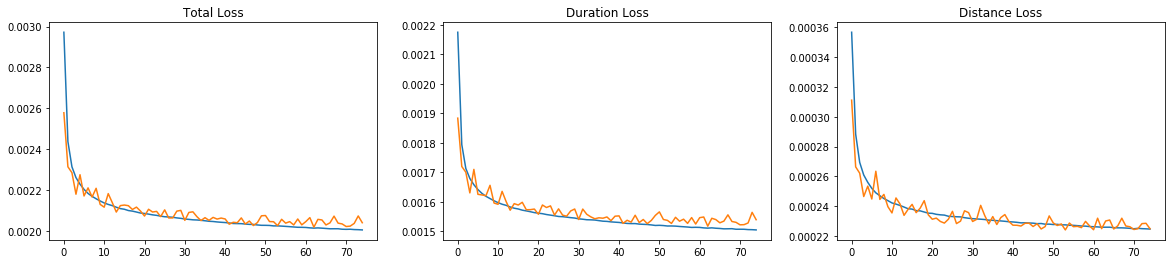

In [73]:
plot_losses_all_models()

In [ ]:
plt.figure()

plt.plot(history['epoch_loss'])
plt.plot(history['epoch_loss'])

#for tag,series in history.items():
#    if 'walltime' in tag:
#        continue
    
#    plt.plot()

In [ ]:
temp_var

In [ ]:
for summary in summary_iterator('./tb_logs/'):
    pass
    # Perform custom processing in here.

In [ ]:
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
def plot_tensorflow_log(path):

    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'scalars': 100,
        'histograms': 1
    }

    event_acc = EventAccumulator(path, tf_size_guidance)
    event_acc.Reload()

    # Show all tags in the log file
    print(event_acc.Scalars.)
    
    training_accuracies =   event_acc.Scalars('training-accuracy')
    validation_accuracies = event_acc.Scalars('validation_accuracy')

    steps = 10
    x = np.arange(steps)
    y = np.zeros([steps, 2])

    for i in xrange(steps):
        y[i, 0] = training_accuracies[i][2] # value
        y[i, 1] = validation_accuracies[i][2]

    plt.plot(x, y[:,0], label='training accuracy')
    plt.plot(x, y[:,1], label='validation accuracy')

    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.title("Training Progress")
    plt.legend(loc='upper right', frameon=True)
    plt.show()

In [ ]:
log_file = "./tb_logs_norm/1553729046.5348523/events.out.tfevents.1553729048.DESKTOP-DGK4H59"
#plot_tensorflow_log(log_file)

In [ ]:
event_acc = EventAccumulator(log_file)


In [ ]:
event_acc.Tensors('loss')


In [7]:
# UNBALANCED MODELS

unbalanced_models = [\
'1554345636.0019655',
'1554349675.8282676',
'1554353724.4575317',
'1554357803.2881935',
'1554361919.8624206',
'1554366058.2883532',
'1554370207.3690598',
'1554374401.6170623',
'1554378618.2651963',
'1554382868.0407453',
'1554387145.2913063',
'1554391460.4826758',
'1554395799.1264904',
'1554400160.0728104']



models_reference = [[unbalanced_models[i],test_pts[i]] for i in range(len(unbalanced_models))]
models_reference

[['1554345636.0019655', 0],
 ['1554349675.8282676', 0.0016],
 ['1554353724.4575317', 0.0035777087639996636],
 ['1554357803.2881935', 0.008],
 ['1554361919.8624206', 0.01788854381999832],
 ['1554366058.2883532', 0.04],
 ['1554370207.3690598', 0.08944271909999159],
 ['1554374401.6170623', 0.2],
 ['1554378618.2651963', 0.4472135954999579],
 ['1554382868.0407453', 1],
 ['1554387145.2913063', 1.2228445449938519],
 ['1554391460.4826758', 1.4953487812212205],
 ['1554395799.1264904', 1.8285790999795744],
 ['1554400160.0728104', 2.23606797749979]]

In [8]:
dir_name = '../keras_models_norm/'
load_models_unb = load_models(dir_name)

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk


In [9]:
BATCH_SIZE = 1024

test_scores = []
for i in range(len(load_models_unb)):
    print("alpha =", test_pts[i])
    score = load_models_unb[i].evaluate(test_input, [test_output[:,0],test_output[:,1]], batch_size=BATCH_SIZE)
    test_scores.append(score)
test_scores = np.array(test_scores)

alpha = 0
972296/972296 [==============================] - 2s 2us/step
alpha = 0.0016
972296/972296 [==============================] - 2s 2us/step
alpha = 0.0035777087639996636
972296/972296 [==============================] - 2s 2us/step
alpha = 0.008
972296/972296 [==============================] - 2s 2us/step
alpha = 0.01788854381999832
972296/972296 [==============================] - 2s 2us/step
alpha = 0.04
972296/972296 [==============================] - 2s 2us/step
alpha = 0.08944271909999159
972296/972296 [==============================] - 2s 2us/step
alpha = 0.2
972296/972296 [==============================] - 2s 2us/step
alpha = 0.4472135954999579
972296/972296 [==============================] - 2s 2us/step
alpha = 1
972296/972296 [==============================] - 2s 2us/step
alpha = 1.2228445449938519
972296/972296 [==============================] - 2s 2us/step
alpha = 1.4953487812212205
972296/972296 [==============================] - 2s 2us/step
alpha = 1.8285790999795744


In [10]:
test_df = pd.DataFrame(test_scores, 
                       columns=['loss', 'loss_dur', 'loss_dist', 'mape_dur', 
                                'mae_dur', 'mare_dur', 'mape_dist', 'mae_dist', 'mare_dist'],
                       index=test_pts)\
          .reset_index()\
          .rename({'index':'alpha'}, axis=1)
test_df

,alpha,loss,loss_dur,loss_dist,mape_dur,mae_dur,mare_dur,mape_dist,mae_dist,mare_dist
0,0.000000,0.001528,0.001528,0.998571,26.588107,0.024855,20.500715,2031.867145,0.722308,959.125469
1,0.001600,0.001552,0.001552,0.000267,25.149523,0.024259,20.007978,16.037404,0.007695,10.208670
2,0.003578,0.001529,0.001528,0.000266,27.649215,0.025052,20.663919,16.988102,0.008103,10.750099
3,0.008000,0.001532,0.001529,0.000260,26.517145,0.024689,20.363083,15.093692,0.007655,10.155819
4,0.017889,0.001540,0.001536,0.000255,24.267702,0.024231,19.984632,12.893915,0.007142,9.474340
5,0.040000,0.001563,0.001553,0.000252,23.981198,0.024312,20.051643,13.573502,0.007322,9.713341
6,0.089443,0.001557,0.001534,0.000256,24.230789,0.024402,20.125914,12.329079,0.007012,9.301887
7,0.200000,0.001572,0.001524,0.000242,25.086410,0.024405,20.129245,13.533556,0.007108,9.428985
8,0.447214,0.001631,0.001524,0.000240,26.706826,0.024551,20.248967,11.814841,0.006925,9.185991
9,1.000000,0.001763,0.001527,0.000236,25.221175,0.024350,20.083336,12.220799,0.006652,8.823552


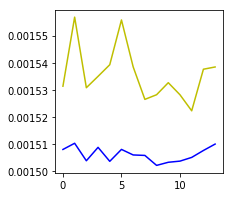

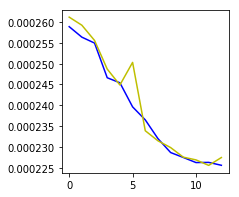

In [21]:
plt.figure(figsize=(3,3))
plt.plot([tensorboard_data[time_stamp]['epoch_duration_loss'][:,1][-1] for time_stamp in unbalanced_models],c='b')
plt.plot([tensorboard_data[time_stamp]['epoch_val_duration_loss'][:,1][-1] for time_stamp in unbalanced_models],c='y')

plt.figure(figsize=(3,3))
plt.plot([tensorboard_data[time_stamp]['epoch_distance_loss'][:,1][-1]     for time_stamp in unbalanced_models][1:],c='b')
plt.plot([tensorboard_data[time_stamp]['epoch_val_distance_loss'][:,1][-1] for time_stamp in unbalanced_models][1:],c='y')

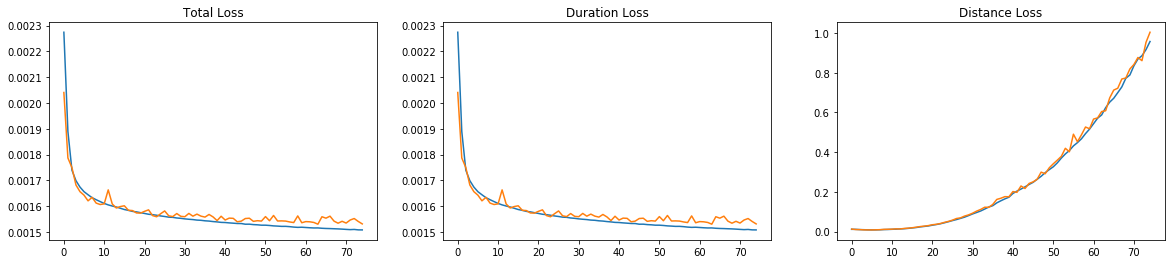

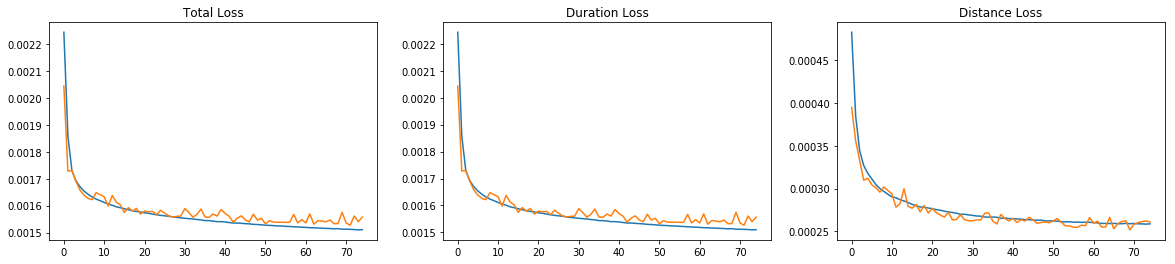

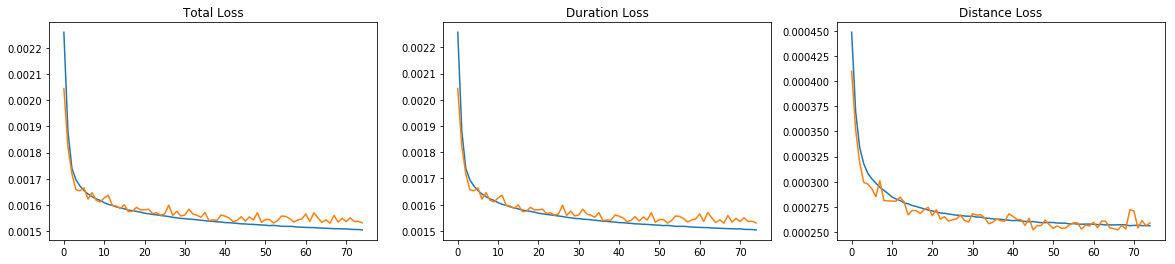

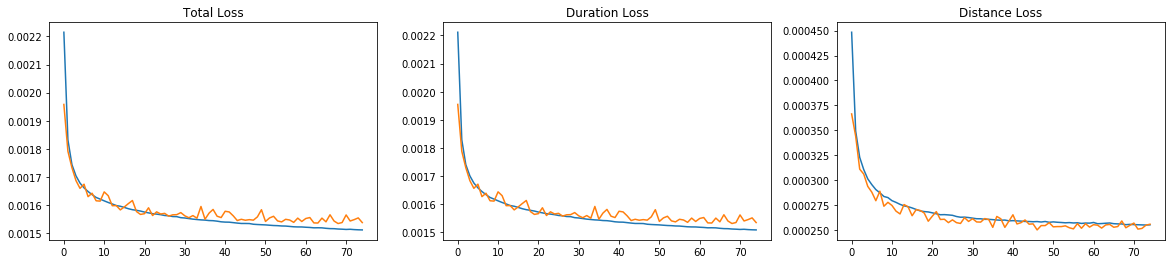

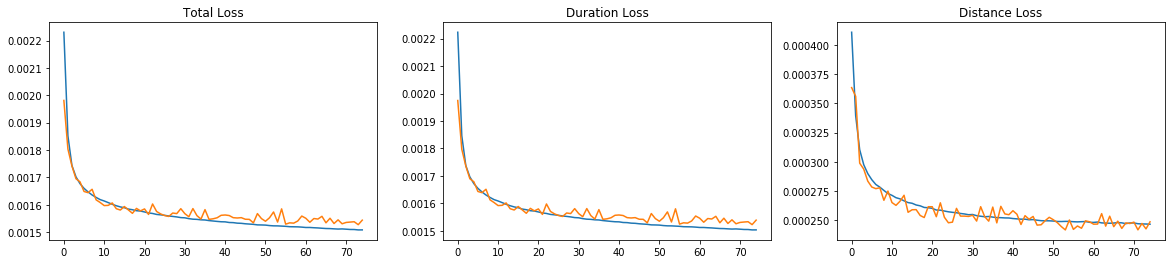

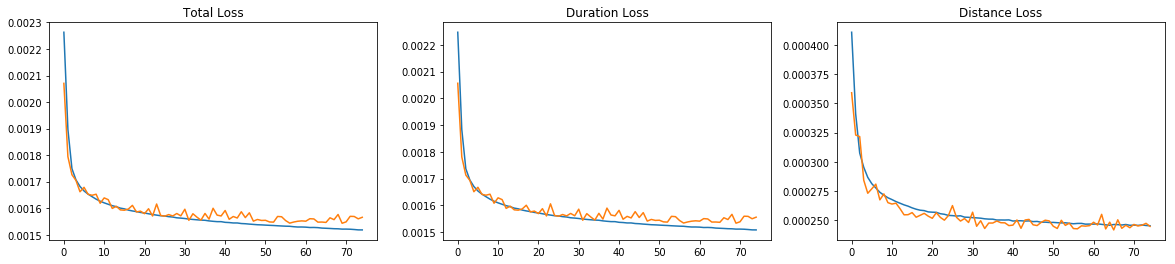

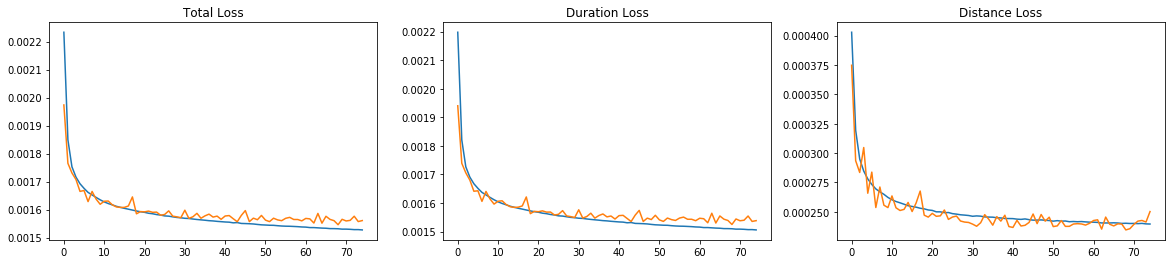

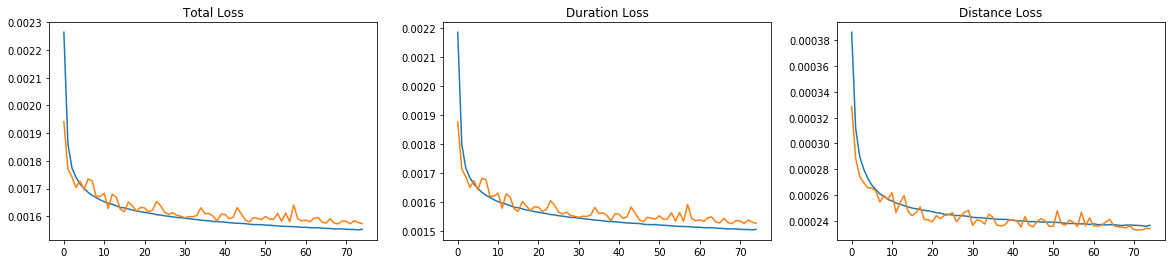

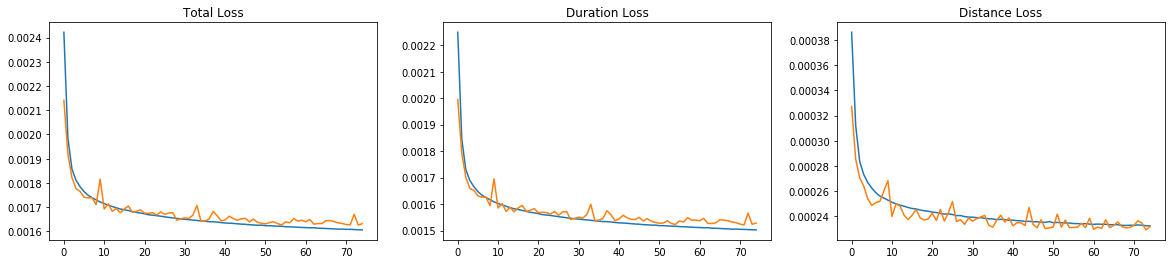

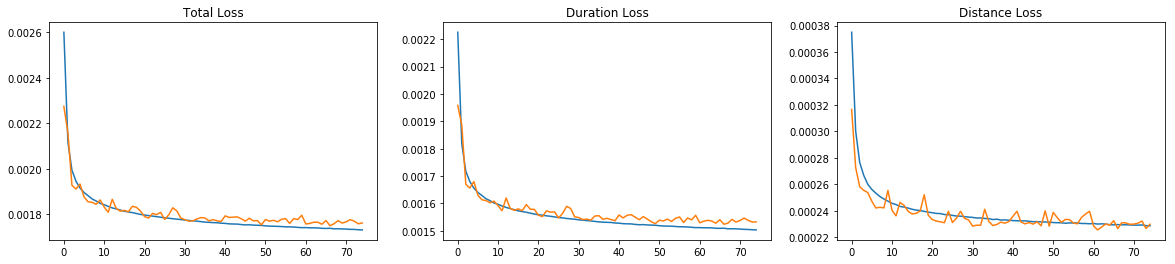

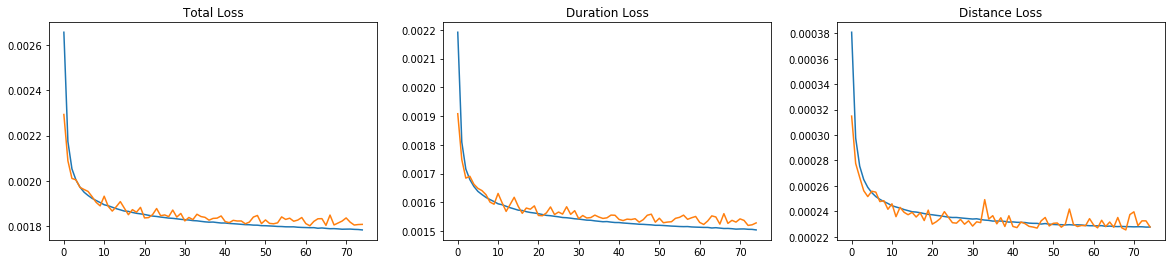

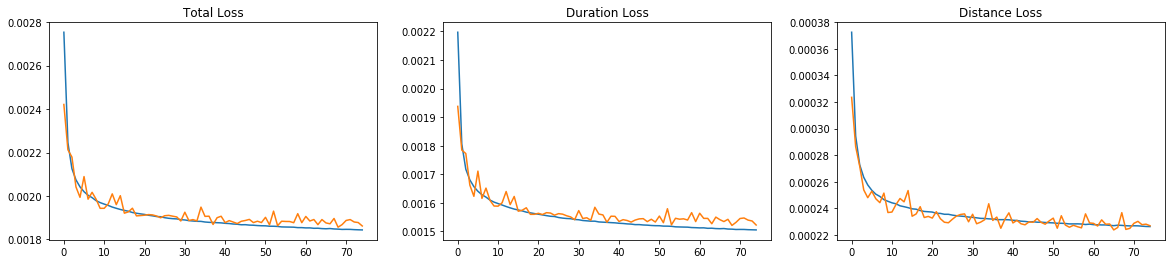

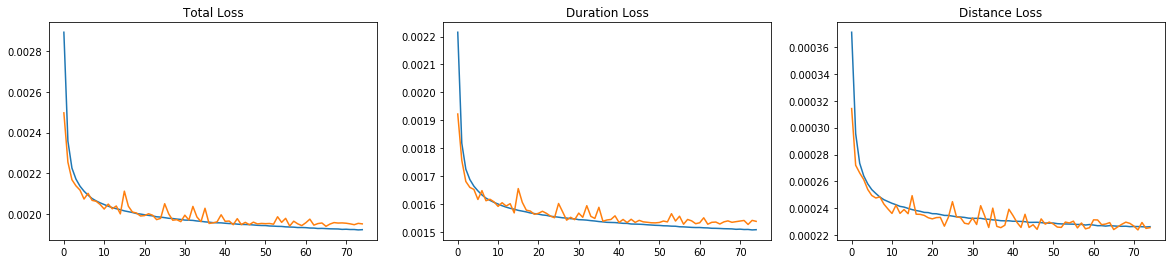

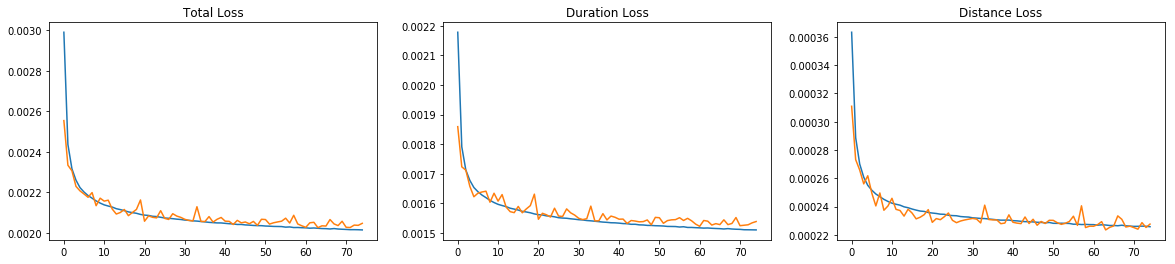

In [23]:
plot_losses_all_models(unbalanced_models)


In [6]:
unbalanced_models_2 = [\
#'1554422791.7792547',
'1554422818.8235586',
'1554426879.9531016',
'1554430953.3309429',
'1554435048.0393565',
'1554439183.0649233',
'1554443355.0479126',
'1554447541.2389681',
'1554451753.9221995',
'1554456013.3321753',
'1554460297.720705',
'1554464592.7604427',
'1554468922.923963',
'1554473297.1003575',
'1554477702.190446']


models_reference = [[unbalanced_models_2[i],test_pts[i]] for i in range(len(unbalanced_models_2))]
models_reference

dir_name = '../keras_models_norm/'
load_models_unb = load_models(dir_name)

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk


In [11]:
load_models_unb[5].summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 36)           0                                            
__________________________________________________________________________________________________
shared_dense1 (Dense)           (None, 100)          3700        input_8[0][0]                    
__________________________________________________________________________________________________
shared_dense2 (Dense)           (None, 100)          10100       shared_dense1[0][0]              
__________________________________________________________________________________________________
shared_dense3 (Dense)           (None, 200)          20200       shared_dense2[0][0]              
__________________________________________________________________________________________________
shared_den

In [12]:
test_df = pd.DataFrame(test_scores, 
                       columns=['loss', 'loss_dur', 'loss_dist', 'mape_dur', 
                                'mae_dur', 'mare_dur', 'mape_dist', 'mae_dist', 'mare_dist'],
                       index=test_pts)\
          .reset_index()\
          .rename({'index':'alpha'}, axis=1)
test_df

NameError: name 'test_scores' is not defined

In [12]:
test_df = pd.DataFrame(test_scores, 
                       columns=['loss', 'loss_dur', 'loss_dist', 'mape_dur', 
                                'mae_dur', 'mare_dur', 'mape_dist', 'mae_dist', 'mare_dist'],
                       index=test_pts)\
          .reset_index()\
          .rename({'index':'alpha'}, axis=1)
test_df

,alpha,loss,loss_dur,loss_dist,mape_dur,mae_dur,mare_dur,mape_dist,mae_dist,mare_dist
0,0.000000,0.001536,0.001536,16.471163,26.032967,0.024718,20.387207,9915.148282,3.303451,4386.116428
1,0.001600,0.001543,0.001542,0.000264,26.841938,0.024723,20.391439,14.381437,0.007806,10.356708
2,0.003578,0.001569,0.001568,0.000265,23.877127,0.024333,20.068767,16.165345,0.007613,10.099869
3,0.008000,0.001544,0.001542,0.000262,27.258087,0.025074,20.681651,15.005219,0.007497,9.946544
4,0.017889,0.001537,0.001533,0.000253,26.623078,0.024645,20.326740,16.265629,0.007629,10.122099
5,0.040000,0.001562,0.001552,0.000250,25.405722,0.024359,20.090073,13.736138,0.007207,9.561176
6,0.089443,0.001576,0.001552,0.000263,27.390721,0.025260,20.834215,19.655308,0.008561,11.360463
7,0.200000,0.001579,0.001530,0.000245,26.519726,0.024857,20.502293,12.537379,0.006959,9.231374
8,0.447214,0.001642,0.001534,0.000242,26.560618,0.024967,20.592809,14.236619,0.007329,9.721881
9,1.000000,0.001845,0.001606,0.000239,25.260238,0.024616,20.302410,13.179429,0.006946,9.214983


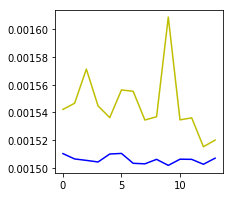

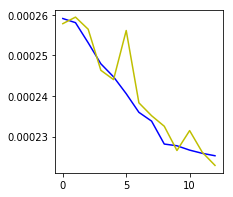

In [19]:
plt.figure(figsize=(3,3))
plt.plot([tensorboard_data[time_stamp]['epoch_duration_loss'][:,1][-1] for time_stamp in models],c='b')
plt.plot([tensorboard_data[time_stamp]['epoch_val_duration_loss'][:,1][-1] for time_stamp in models],c='y')

plt.figure(figsize=(3,3))
plt.plot([tensorboard_data[time_stamp]['epoch_distance_loss'][:,1][-1]     for time_stamp in models][1:],c='b')
plt.plot([tensorboard_data[time_stamp]['epoch_val_distance_loss'][:,1][-1] for time_stamp in models][1:],c='y')

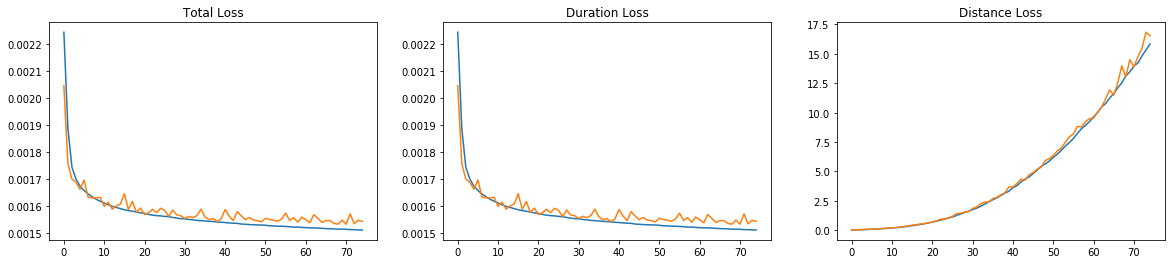

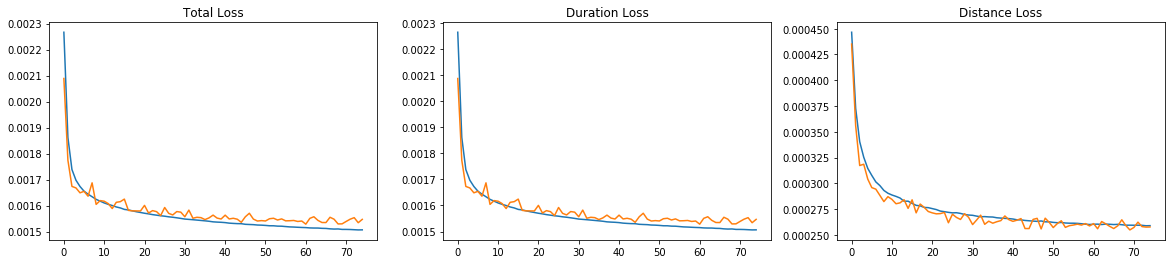

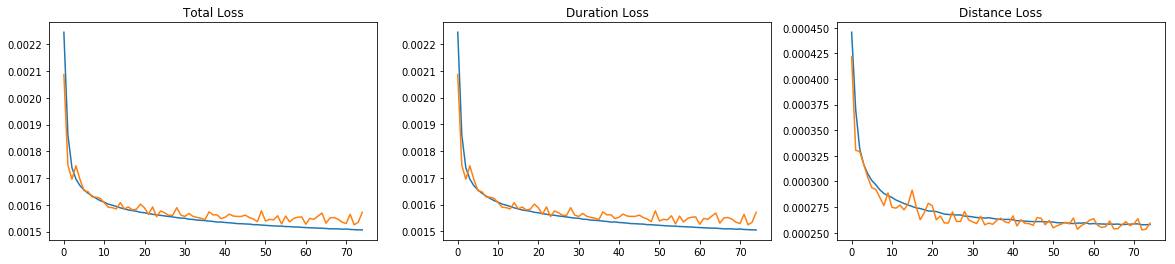

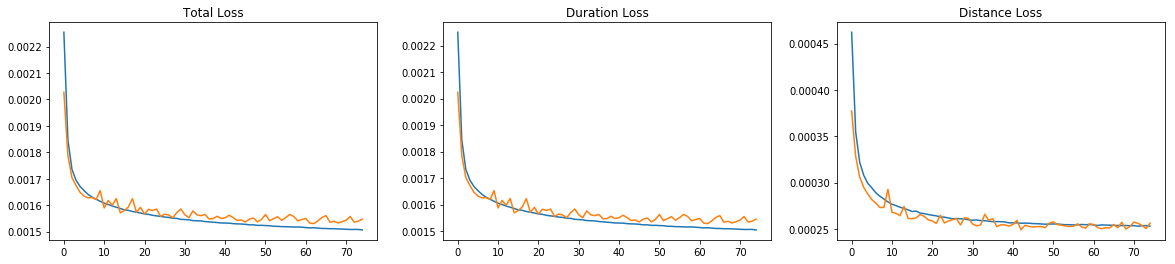

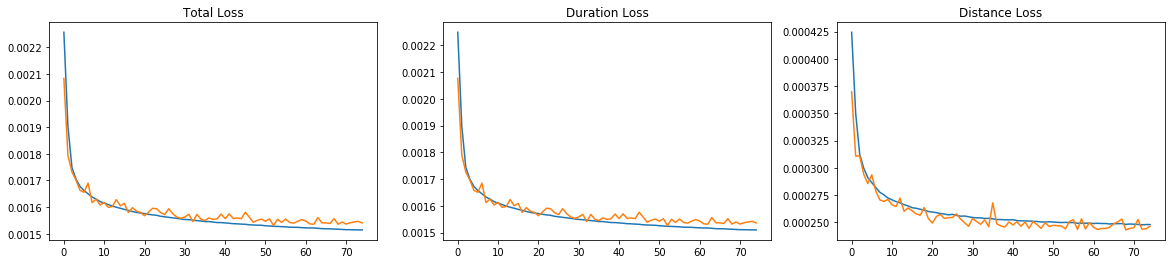

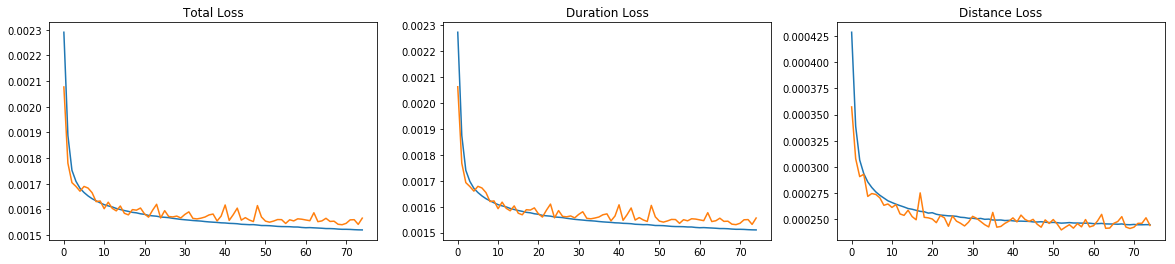

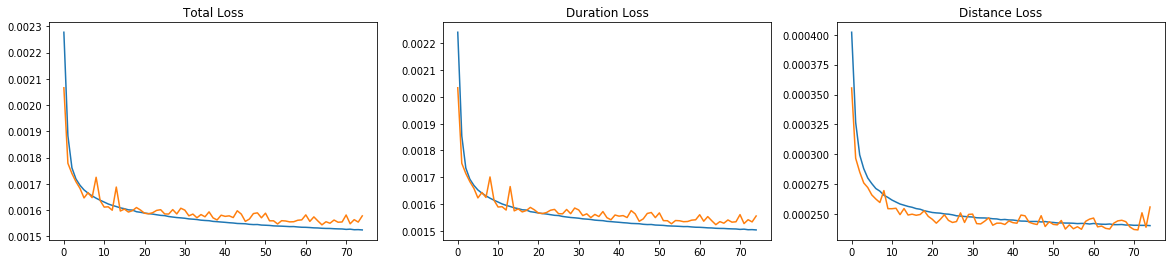

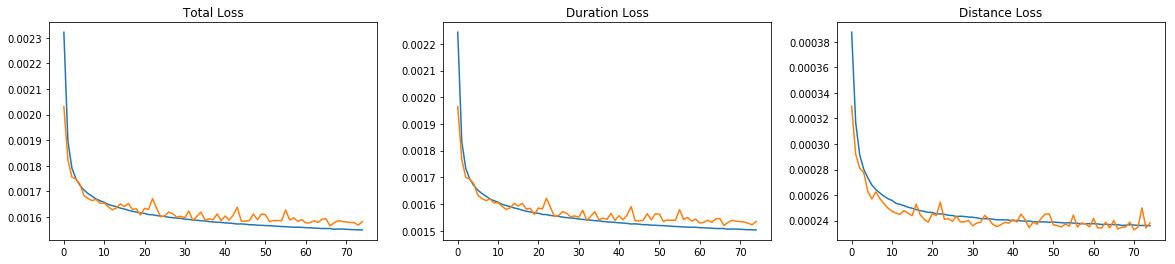

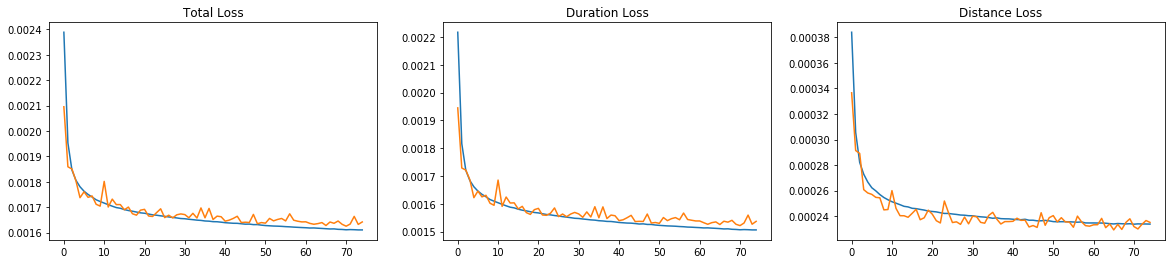

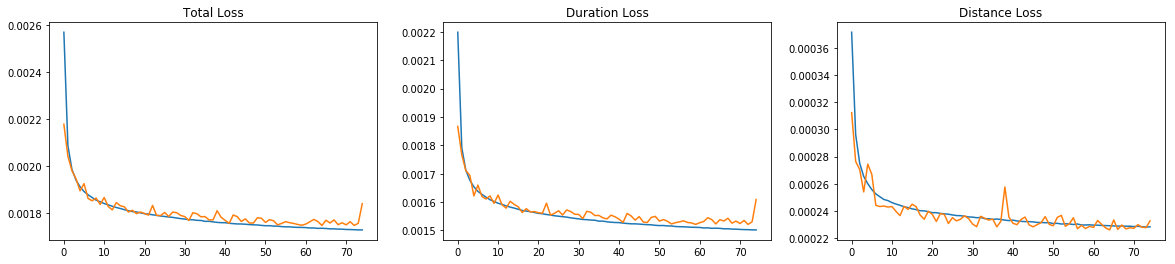

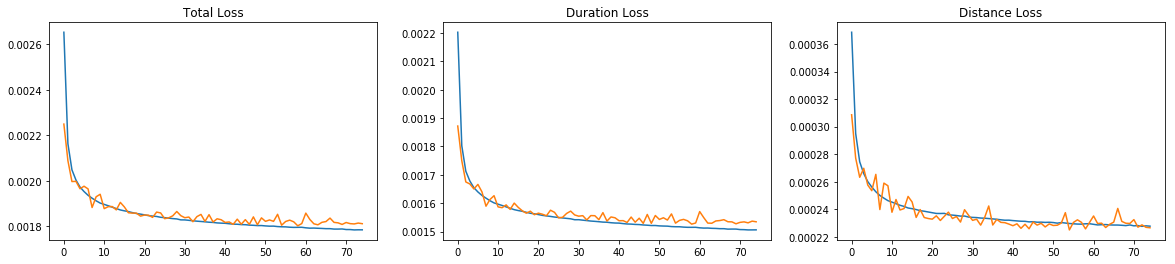

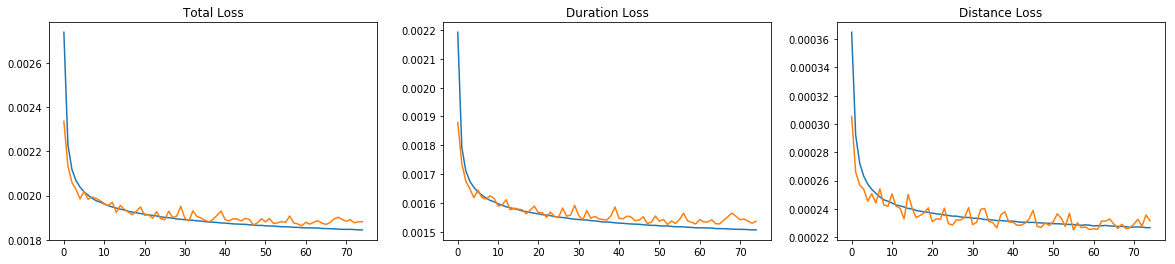

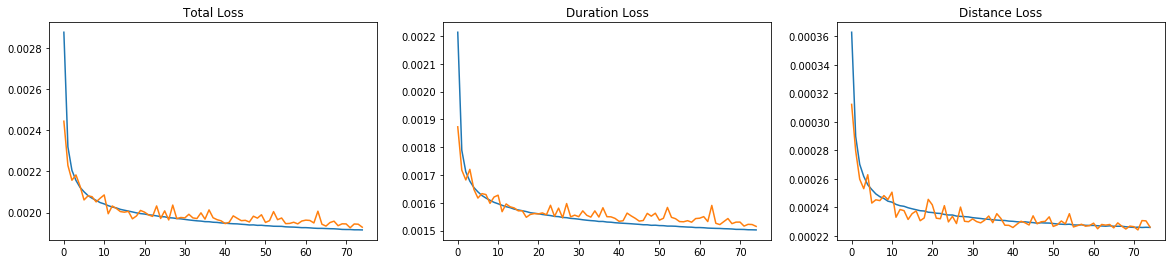

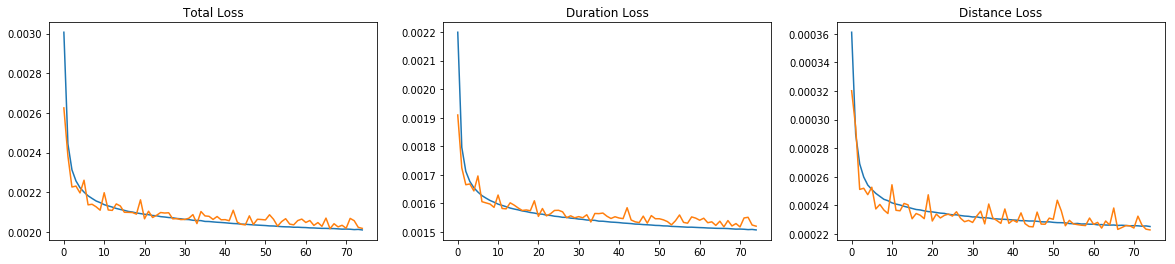

In [20]:
plot_losses_all_models(unbalanced_models_2)